In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as mnso
from ast import literal_eval

In [3]:
#importando datasets http://www.respeitoavida.sp.gov.br/relatorios/
df_obitos_raw=pd.read_csv(r'C:\Users\Renato\OneDrive\Projeto_TERA\Predição Acidentes Motocicleta\Datasets\obitos_publico.csv',encoding='unicode_escape',sep=';')
df_nao_fatais_raw = pd.read_csv(r'C:\Users\Renato\OneDrive\Projeto_TERA\Predição Acidentes Motocicleta\Datasets\acidentes_naofatais.csv',encoding='unicode_escape',sep=';')
df_fatais_raw = pd.read_excel(r'C:\Users\Renato\OneDrive\Projeto_TERA\Predição Acidentes Motocicleta\Datasets\acidentes_fatais.xlsx')

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
#checando duplicatas
df_obitos_raw.duplicated().value_counts() #achado 97 linhas duplicadas (os outros df's não tem duplicatas)
df_obitos_raw = df_obitos_raw.drop_duplicates()#dropando as 97 duplicatas, temos 34657 linhas

In [5]:
# Criando Dataframes para trabalhar
df_nao_fatais = df_nao_fatais_raw.copy()

df_fatais = df_fatais_raw.copy()#NAO TEMOS COMO FILTRAR POR MOTOCILCETA POIS NAO TEM ESSA COLUNA!!!!

df_obitos = df_obitos_raw.copy()#AQUI CONSEGUIMOS FILTRAR POR MOTOCICLETA

In [6]:
#checando sempre a quantidade de dados dos dataframes
print('obitos',df_obitos.shape)
print('fatais',df_fatais.shape)
print('Ñ fatais',df_nao_fatais.shape)

obitos (34657, 34)
fatais (31791, 32)
Ñ fatais (377613, 55)


In [7]:
#Arrumando o nome das colunas
df_obitos = df_obitos_raw.rename(columns={'LAT_(GEO)':'Latitude',
                                          'LONG_(GEO)':'Longitude',
                                          'Tipo de via':'Tipo de Via',
                                         'Id da Delegacia (RDO)':'Id Delegacia', 'Número do Bo (RDO)':'Número BO',
                                          'Ano do BO (RDO)':'Ano BO','Númeral / KM':'Numero/KM'})

df_nao_fatais = df_nao_fatais_raw.rename(columns={'LAT_(GEO)':'Latitude','LONG_(GEO)':'Longitude'})


df_fatais =df_fatais_raw.rename(columns={'Lat (GEO)':'Latitude','Long (GEO)':'Longitude','Numeral / KM':'Numero/KM',
                                         'Iluminação da via (SIOPM)':'Iluminação',
                                        'Superfície da Via (SIOPM)':'Superfície da via', 
                                         'Dia da semana':'Dia da Semana',
                                         'Tipo de via':'Tipo de Via',
                                         'Tipo de pista (SIOPM)':'Tipo de pista',
                                         'Id Delegacia (RDO)':'Id Delegacia', 'Número BO (RDO)':'Número BO', 
                                         'Ano BO (RDO)':'Ano BO',
                                        'Condições Climáticas (SIOPM)':'Condições Climáticas'})

In [8]:
# dropando colunas duplicada
# no df_nao_fatais, colunas 'Condições da pista' e 'Tipo de pista', portando dropamos a coluna 'Condições da pista'
df_nao_fatais.drop(['Condições da pista'],axis=1,inplace=True)

In [9]:
#alterando tipos de variáveis
df_obitos['Data do Acidente'] = pd.to_datetime(df_obitos['Data do Acidente'],errors='coerce')

df_nao_fatais['Data do Acidente'] = pd.to_datetime(df_nao_fatais['Data do Acidente'],format='%Y-%m-%d')
df_nao_fatais['Ano do Acidente'] = pd.to_datetime(df_nao_fatais['Ano do Acidente'],format='%Y')
df_nao_fatais['Dia do Acidente'] = pd.to_datetime(df_nao_fatais['Dia do Acidente'],format='%d')

df_fatais.loc[31790,'Data do Acidente']='2020-02-27'
df_fatais['Data do Acidente'] = pd.to_datetime(df_fatais['Data do Acidente'],format='%Y-%m-%d')
df_fatais.loc[31790, 'Ano do Acidente']='2020'
df_fatais['Ano do Acidente'] = pd.to_datetime(df_fatais['Ano do Acidente'],format='%Y')
df_fatais['Dia do Acidente'] = pd.to_datetime(df_fatais['Dia do Acidente'],format='%d')

In [10]:
df_obitos.columns

Index(['Id Delegacia', 'Número BO', 'Ano BO', 'Data do Óbito',
       'Data do Acidente', 'Tipo de Via', 'Dia do óbito', 'Mês do Óbito',
       'Mês Óbito Descrição', 'Ano do Óbito', 'Ano/Mês do Óbito',
       'Dia da Semana', 'Hora do Acidente', 'Turno', 'Município',
       'Região Administrativa', 'Logradouro', 'Numero/KM', 'Jurisdição',
       'Administração', 'Conservação', 'Tipo do local da ocorrência',
       'Latitude', 'Longitude', 'Tipo do veículo da vítima', 'Tipo de vítima',
       'Local do óbito', 'Tipo de acidente', 'Sub Tipo do Acidente', 'Sexo',
       'Faixa etária', 'Idade da vítima', 'Outro Veículo Envolvido',
       'Tempo entre o Acidente e o Óbito'],
      dtype='object')

In [11]:
df_obitos[['Hora do Acidente','Data do Acidente']]

,Hora do Acidente,Data do Acidente
0,17:30:00,2021-02-28
1,10:55:00,2021-02-28
2,19:50:00,2021-02-27
3,20:18:00,2021-02-28
4,18:50:00,2021-02-28
...,...,...
34749,19:00:00,2015-01-01
34750,01:20:00,2015-01-01
34751,10:48:00,2015-01-01
34752,07:40:00,2015-01-01


In [12]:
#juntando a df_fatais_geral com df_nao_fatais, criando df_acidentes
df_fatais_geral = df_fatais.merge(df_obitos,
                                  on=['Número BO','Data do Acidente','Ano BO','Hora do Acidente','Turno','Município','Região Administrativa','Jurisdição','Administração','Conservação','Outro Veículo Envolvido','Tipo de Via','Logradouro','Dia da Semana','Numero/KM','Id Delegacia','Latitude','Longitude'])

In [13]:
#checando sempre a quantidade de dados dos dataframes
print('obitos',df_obitos.shape)
print('fatais',df_fatais.shape)
print('Ñ fatais',df_nao_fatais.shape)
print('merge',df_fatais_geral.shape)

obitos (34657, 34)
fatais (31791, 32)
Ñ fatais (377613, 54)
merge (33934, 48)


In [14]:
df_fatais_geral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33934 entries, 0 to 33933
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ID                                   33934 non-null  int64         
 1   Id Delegacia                         33934 non-null  int64         
 2   Número BO                            33934 non-null  int64         
 3   Ano BO                               33934 non-null  int64         
 4   Data do Acidente                     33934 non-null  datetime64[ns]
 5   Dia do Acidente                      33934 non-null  datetime64[ns]
 6   Mês do Acidente                      33934 non-null  object        
 7   Ano do Acidente                      33934 non-null  datetime64[ns]
 8   Ano/Mês do Acidente                  33934 non-null  float64       
 9   Dia da Semana                        33934 non-null  object        
 10  Hora do Ac

In [15]:
#checando o pq algumas variáveis acima tem valores nulos. 
df_fatais_geral['Outro Veículo Envolvido'].value_counts()
# Temos apenas 22544 valores não nulos de 33934. Podemos considerar essa diferença de nulos como da categoria "Não Há"?? E os "não disponíveis" podem ser considerados "Não Há"?? Se sim fazer um apply lambda pra corrigir isso. CHECAR COM O GRUPO!!!

AUTOMOVEL         7650
NÃO HÁ            4561
NAO DISPONIVEL    3503
CAMINHAO          3450
MOTOCICLETA       1724
ONIBUS            1376
OUTROS             143
BICICLETA           94
PEDESTRE            43
Name: Outro Veículo Envolvido, dtype: int64

In [16]:
df_fatais_geral['Sub Tipo do Acidente'].value_counts()
#aqui quase 50% dos dados são nulos. E temos muitas categorias....CHECAR COM O GRUPO!!!

NAO DISPONIVEL                           3512
FRONTAL                                  2136
CRUZANDO A VIA                           1858
TRASEIRA                                 1382
LATERAL                                  1144
TOMBAMENTO VEÍCULO DE 2 RODAS            1142
POSTE                                     813
TRANSVERSAL                               782
CAPOTAMENTO                               695
ANDANDO NA VIA / ACOSTAMENTO              523
ÁRVORE                                    464
DEFENSA / BARREIRA                        440
MURO/PAREDE/TALUDE                        406
VEÍCULO ESTACIONADO                       399
OUTROS                                    265
CONDUTOR/PASSAGEIROS FORA DO VEÍCULO      218
QUEDA (ÁGUA, BARRANCO, PONTE)             176
NA CALÇADA                                163
TOMBAMENTO VEÍCULO DE MAIS DE 2 RODAS     154
MEIO-FIO/CALÇAMENTO/DRENAGEM              150
ANIMAL                                    109
ENGAVETAMENTO                     

In [17]:
#criando colunas com labels de fatal e não falal antes de juntar
df_fatais_geral['Acidente Fatal']=1
df_fatais_geral['Acidente Não Fatal']=0
df_nao_fatais['Acidente Fatal']=0
df_nao_fatais['Acidente Não Fatal']=1


In [19]:
#juntando a df_fatais_geral com df_nao_fatais criando df_acidentes
df_acidentes = pd.concat([df_nao_fatais,df_fatais_geral])

In [20]:
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411547 entries, 0 to 33933
Data columns (total 80 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   ID                                           411547 non-null  int64         
 1   Data do Acidente                             411547 non-null  datetime64[ns]
 2   Dia do Acidente                              411547 non-null  datetime64[ns]
 3   Mês do Acidente                              411547 non-null  object        
 4   Ano do Acidente                              411547 non-null  datetime64[ns]
 5   Ano/Mês do Acidente                          411547 non-null  float64       
 6   Dia da Semana                                411547 non-null  object        
 7   Hora do Acidente                             411547 non-null  object        
 8   Turno                                        411547 non-null  obj

In [21]:
#checando sempre a quantidade de dados dos dataframes
print('df_obitos',df_obitos.shape)
print('df_fatais',df_fatais.shape)
print('df_nao_fatais',df_nao_fatais.shape)
print('df_fatais_geral',df_fatais_geral.shape)
print('df_acidentes',df_acidentes.shape)

df_obitos (34657, 34)
df_fatais (31791, 32)
df_nao_fatais (377613, 56)
df_fatais_geral (33934, 50)
df_acidentes (411547, 80)


In [22]:
#FILTROS
# Filtrando por Região metropolitana de SP
df_acidentes_sp = df_acidentes.loc[df_acidentes['Região Administrativa']=='Metropolitana de São Paulo']#
# df_nao_fatais_sp_moto = df_nao_fatais_sp_moto.loc[df_nao_fatais_sp_moto['Data do Acidente']>='2019-01-01']
# df_nao_fatais_sp_moto = df_nao_fatais_sp_moto.loc[df_nao_fatais_sp_moto['Data do Acidente']<='2020-12-31']

In [23]:
#filtrando por acidentes que envolvem motocicleta
# criando dataframes preliminares com diferentes filtros, pra depois concatenar
df_acidentes_sp_moto1 = df_acidentes_sp.loc[df_acidentes_sp['Veículos Envolvidos - Motocicleta']==1] #dados que vem do "não fatais" onde temos motos envolvidas
df_acidentes_sp_moto2 = df_acidentes_sp.loc[df_acidentes_sp['Tipo do veículo da vítima']=='MOTOCICLETA'] # dados que vem dos "fatais", que são os óbitos de motocicleta
df_acidentes_sp_moto3 = df_acidentes_sp.loc[df_acidentes_sp['Outro Veículo Envolvido']=='MOTOCICLETA'] # dados que vem dos "fatais" , que podem ter motos como outo veículo envolvido
#concatenando os 3 dataframes
df_acidentes_sp_moto = pd.concat([df_acidentes_sp_moto1,df_acidentes_sp_moto2,df_acidentes_sp_moto3])
#checando duplicatas
df_acidentes_sp_moto.duplicated().value_counts() #169 duplicatas pois tem como motocicletas o 'Tipo do veículo da vítima' e 'Outro Veículo Envolvido', do df_fatais. deletar!
df_acidentes_sp_moto = df_acidentes_sp_moto.drop_duplicates()
#criando um indice novo
df_acidentes_sp_moto.reset_index(inplace=True)


In [24]:
#checando sempre a quantidade de dados dos dataframes
print('df_obitos',df_obitos.shape)
print('df_fatais',df_fatais.shape)
print('df_nao_fatais',df_nao_fatais.shape)
print('df_fatais_geral',df_fatais_geral.shape)
print('df_acidentes',df_acidentes.shape)
print('df_acidentes_sp',df_acidentes_sp.shape)
print('df_acidentes_sp_moto',df_acidentes_sp_moto.shape)


df_obitos (34657, 34)
df_fatais (31791, 32)
df_nao_fatais (377613, 56)
df_fatais_geral (33934, 50)
df_acidentes (411547, 80)
df_acidentes_sp (159898, 80)
df_acidentes_sp_moto (62479, 81)


In [25]:
df_acidentes_sp_moto = df_acidentes_sp_moto[['Data do Acidente', 'Dia da Semana',
       'Hora do Acidente', 'Turno', 'Município','Logradouro','Numero/KM', 'Jurisdição', 'Administração', 'Conservação',
       'Latitude', 'Longitude', 'Condições Climáticas', 'Iluminação',
       'Mão de direção', 'Relevo', 'Superfície da via',
       'Tipo de pavimento', 'Tipo de pista', 'Traçado',
       'Tipo de Via','Acidente Fatal','Acidente Não Fatal']]

In [24]:
#Definir variáveis ciclicas:
#mes, dia da semana, hora, turno

#recursive feature extraction (escolhe o número de variáveis)

#Checklist features: Total do dataset 62,5K linhas e 4318 fatais.
# 'Data do Acidente' OK
# 'Dia da Semana' OK
# Turno e hora do acidente : 253 ND e todos vem dos fatais...temos que consertar isso. fillna moda!! JÁ FIZ!
#municipio OK
# Jurisdição: 4 categorias, 882 ND, só no fatais temos 184 ND. fillna randomico e proporcional?
# Administração: 5 categorias, 14020 ND, só no fatais tem 142 ND. fillna randomico e proporcional?
# Conservação: 16 categorias, 1403 ND, só no fatais tem 143 ND
# cond climaticas: 7 categorias, 11529 ND, só nos fatais tem 3588. API de confição do tempo pra completar os dados?*******************
# iluminação : 8 Categorias,  12540 ND, só nos fatias tem 3588. O que faremos aqui?? correlacionar com outros endereços e pegar a informação?************* DADOS NÃO PARECEM CONFIAVEIS
# 'Mão de direção' (EXCLUSIVO NAO FATAIS): 2 Categ, 9020 ND, porém não temos dados de fatais. correlacionar com outros endereços e pegar a informação?
# 'Obras na pista': 55k ND, melhor dropar
# 'Relevo' (EXCLUSIVO NAO FATAIS): 3 Categorias, 9020 ND, porém não temos dados de fatais. correlacionar com outros endereços e pegar a informação?
# 'Superfície da via': 6 categorias, 12603 ND,  só nos fatais tem 3583. O que faremos aqui??***********
# Tipo de pavimento (EXCLUSIVO NAO FATAIS): 7 categorias, 9020 ND, porém não temos dados de fatais. correlacionar com outros endereços e pegar a informação?
# Tipo de pista: 3 categorias, 11276 ND, só nos fatais tem 3583 ND. O que fazer aqui?***********
# 'Traçado'(EXCLUSIVO NAO FATAIS):7 categorais, 9020 ND porém nao temos em fatais.
# Veículos envolvidos (EXCLUSIVO NAO FATAIS): todos já são dummies, porém são de não fatais. dropar para prever fatal e não fatal.
# Pessoas envoldias (EXCLUSIVO NAO FATAIS): todos já são dummies, porém são de não fatais. dropar para prever fatal e não fatal.
# Tipo de Via: 2 categorias, 778 ND sendo 129 no fatais.
# Tipo de acidente (EXCLUSIVO NAO FATAIS): todos já são dummies, porém são de não fatais. dropar para prever fatal e não fatal.
# 'Tipo do Local do Acidente' E DEMAIS (EXCLUSIVO PARA FATAIS): DROPAR TUDO PQ É SÓ PRA FATAIS.

In [25]:
#entendendo melhor os missing values de condição climática
# df_acidentes_sp_moto['Condições Climáticas'].loc[df_acidentes_sp_moto['Condições Climáticas'].isnull()]
#16 antes de 2015
#700 em 2015
#640 em 2016
#715 em 2017
#770 em 2018
#4550 em 2019
#3646 em 2020
#492 em 2021
# df_acidentes_sp_moto['Condições Climáticas'].loc[(df_acidentes_sp_moto['Data do Acidente']>='2000-01-01')&(df_acidentes_sp_moto['Data do Acidente']<'2022-01-01')&(df_acidentes_sp_moto['Condições Climáticas'].isnull())&(df_acidentes_sp_moto['Acidente Fatal']==1)]


In [26]:
#Substituir os nao disponiveis por nulos
df_acidentes_sp_moto.replace('NAO DISPONIVEL', np.nan,inplace=True)
df_acidentes_sp_moto.replace('NÃO', np.nan,inplace=True)
df_acidentes_sp_moto.replace('NÃO HÁ', np.nan,inplace=True)
df_acidentes_sp_moto.columns



Index(['Data do Acidente', 'Dia da Semana', 'Hora do Acidente', 'Turno',
       'Município', 'Logradouro', 'Numero/KM', 'Jurisdição', 'Administração',
       'Conservação', 'Latitude', 'Longitude', 'Condições Climáticas',
       'Iluminação', 'Mão de direção', 'Relevo', 'Superfície da via',
       'Tipo de pavimento', 'Tipo de pista', 'Traçado', 'Tipo de Via',
       'Acidente Fatal', 'Acidente Não Fatal'],
      dtype='object')

In [27]:
df_acidentes_sp_moto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data do Acidente      62479 non-null  datetime64[ns]
 1   Dia da Semana         62479 non-null  object        
 2   Hora do Acidente      62226 non-null  object        
 3   Turno                 62226 non-null  object        
 4   Município             62479 non-null  object        
 5   Logradouro            61653 non-null  object        
 6   Numero/KM             57775 non-null  object        
 7   Jurisdição            61597 non-null  object        
 8   Administração         61077 non-null  object        
 9   Conservação           61076 non-null  object        
 10  Latitude              58741 non-null  object        
 11  Longitude             58740 non-null  object        
 12  Condições Climáticas  50950 non-null  object        
 13  Iluminação      

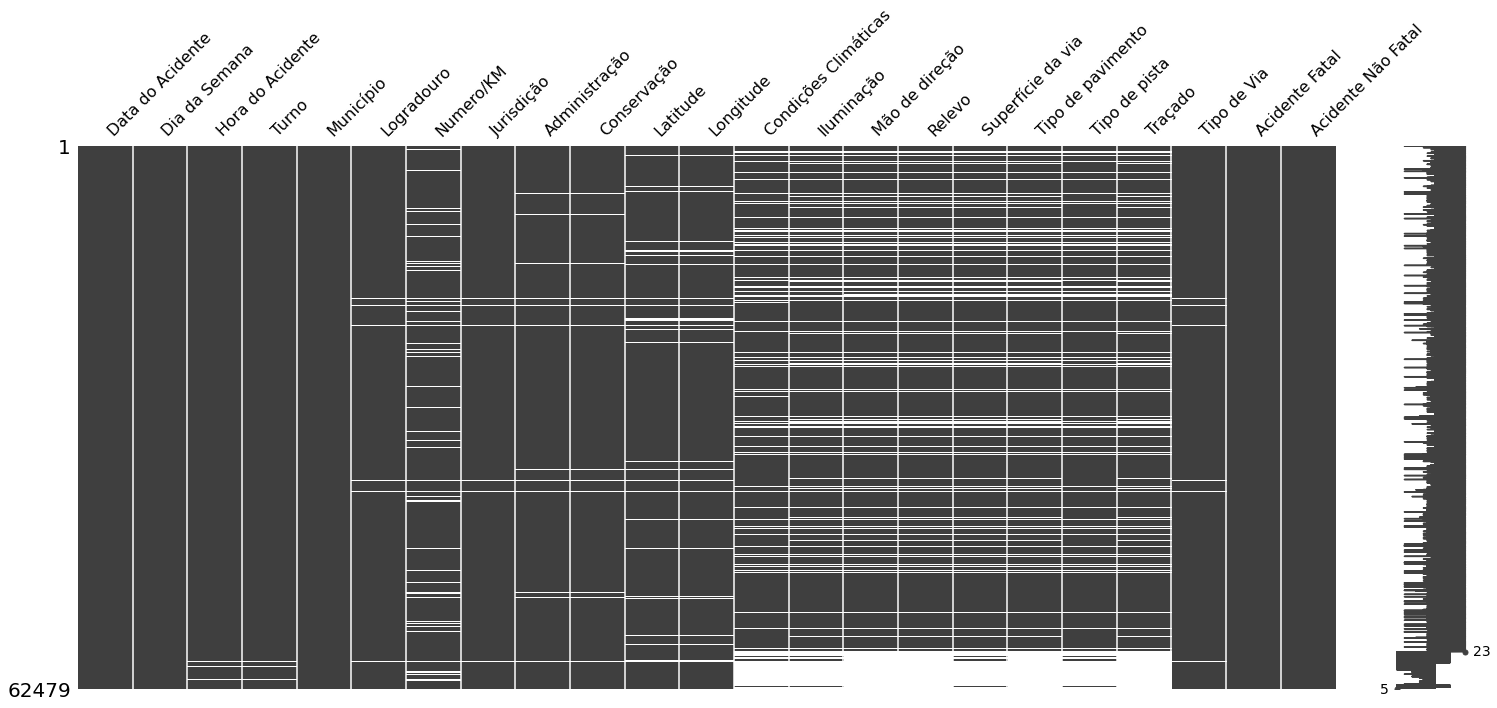

In [30]:
mnso.matrix(df_acidentes_sp_moto)
plt.savefig('mnso.png',dpi=600, bbox_inches = 'tight')

In [29]:
#calculando quanto perderiamos se dropassemos tudo em branco
df_dropped = df_acidentes_sp_moto.dropna()
# df_dropped.shape[0]/df_acidentes_sp_moto.shape[0]

df_dropped.loc[df_dropped[ 'Acidente Fatal']==0]

,Data do Acidente,Dia da Semana,Hora do Acidente,Turno,Município,Logradouro,Numero/KM,Jurisdição,Administração,Conservação,...,Iluminação,Mão de direção,Relevo,Superfície da via,Tipo de pavimento,Tipo de pista,Traçado,Tipo de Via,Acidente Fatal,Acidente Não Fatal
3,2021-02-28,DOMINGO,15:14,TARDE,SAO PAULO,RUA TABAPUA,245,MUNICIPAL,PREFEITURA,PREFEITURA,...,LUZ SOLAR,ÚNICA,PLANO,MOLHADA,ASFALTO,SIMPLES,CRUZAMENTO,Vias Municipais,0,1
4,2021-02-28,DOMINGO,15:18,TARDE,SAO PAULO,AVENIDA SAO MIGUEL,39,MUNICIPAL,PREFEITURA,PREFEITURA,...,LUZ SOLAR,DUPLA,INCLINADO,SECA,ASFALTO,DUPLA,DIFICULTA A ESTABILIDADE,Vias Municipais,0,1
5,2021-02-28,DOMINGO,18:34,NOITE,SAO PAULO,RUA SAO PASCAL,269,MUNICIPAL,PREFEITURA,PREFEITURA,...,NOITE (VIA ILUMINADA),ÚNICA,PLANO,MOLHADA,ASFALTO,SIMPLES,RETA,Vias Municipais,0,1
7,2021-02-28,DOMINGO,18:45,NOITE,SAO PAULO,ACESSO DOUTOR EDUARDO COTCHING,586,MUNICIPAL,PREFEITURA,PREFEITURA,...,NOITE (VIA ILUMINADA),DUPLA,INCLINADO,MOLHADA,ASFALTO,SIMPLES,CURVA,Vias Municipais,0,1
9,2021-02-28,DOMINGO,12:53,TARDE,SAO PAULO,AVENIDA ATLANTICA,205,MUNICIPAL,PREFEITURA,PREFEITURA,...,LUZ SOLAR,ÚNICA,PLANO,SECA,ASFALTO,MULTIPLA,RETA,Vias Municipais,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58151,2019-01-01,TERÇA,20:58,NOITE,SAO PAULO,SP 015,2,MUNICIPAL,PREFEITURA,PREFEITURA,...,NOITE (VIA ILUMINADA),ÚNICA,PLANO,MOLHADA,ASFALTO,SIMPLES,CRUZAMENTO,Rodovias,0,1
58152,2019-01-01,TERÇA,20:33,NOITE,SAO PAULO,ESTRADA DO CAMPO LIMPO,3809,MUNICIPAL,PREFEITURA,PREFEITURA,...,LUZ SOLAR,ÚNICA,PLANO,SECA,ASFALTO,DUPLA,RETA,Vias Municipais,0,1
58153,2019-01-01,TERÇA,21:55,NOITE,SAO PAULO,ESTRADA DA BARONESA,27,MUNICIPAL,PREFEITURA,PREFEITURA,...,NOITE (VIA ILUMINADA),DUPLA,INCLINADO,SECA,ASFALTO,DUPLA,CURVA,Vias Municipais,0,1
58154,2019-01-01,TERÇA,23:23,NOITE,SAO PAULO,AVENIDA SAPOPEMBA,1663,MUNICIPAL,PREFEITURA,PREFEITURA,...,NOITE (VIA ILUMINADA),DUPLA,INCLINADO,SECA,ASFALTO,DUPLA,RETA,Vias Municipais,0,1


In [30]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43169 entries, 3 to 58155
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data do Acidente      43169 non-null  datetime64[ns]
 1   Dia da Semana         43169 non-null  object        
 2   Hora do Acidente      43169 non-null  object        
 3   Turno                 43169 non-null  object        
 4   Município             43169 non-null  object        
 5   Logradouro            43169 non-null  object        
 6   Numero/KM             43169 non-null  object        
 7   Jurisdição            43169 non-null  object        
 8   Administração         43169 non-null  object        
 9   Conservação           43169 non-null  object        
 10  Latitude              43169 non-null  object        
 11  Longitude             43169 non-null  object        
 12  Condições Climáticas  43169 non-null  object        
 13  Iluminação      

In [31]:
# EXPORTANDO DADOS PARA RECUPERAR MISSING VALUES DE LAT E LON COM API GOOGLE MAPS
df_LATLONG_Null = df_acidentes_sp_moto[['Logradouro','Numero/KM','Município']].loc[(df_acidentes_sp_moto['Longitude'].isnull())&(df_acidentes_sp_moto['Logradouro'].notnull())]##POTENCIAL DE RECUPERAR 2929 LINHAS, SENDO 105 FATAIS
# df_LATLONG_Null.to_csv("C:\\Users\Renato\OneDrive\Projeto_TERA\Predição Acidentes Motocicleta\Projeto-TERA-Data-Science---Acidentes-Motocicletas\Google_Maps_API\input_API\df_LATLONG_Null2.csv")

In [32]:
# IMPORTANTO DADOS DO API GOOGLE MAPS E PREENCHENDO NO DATAFRAME
df_latlon_from_API = pd.read_csv("C:\\Users\Renato\OneDrive\Projeto_TERA\Predição Acidentes Motocicleta\Projeto-TERA-Data-Science---Acidentes-Motocicletas\Google_Maps_API\output_API\df_dados_API_lat_lon2.csv")

# criando dict pra preencher o dataset
fill_dict = df_latlon_from_API.set_index('Indice_ori')['Location'].to_dict()
#preenchendo dataset
#criando indice dummy
df_acidentes_sp_moto['Indice_original'] = df_acidentes_sp_moto.index
#usando dict map
df_acidentes_sp_moto['Location']=np.NaN
df_acidentes_sp_moto['Location'] = df_acidentes_sp_moto['Location'].fillna(df_acidentes_sp_moto['Indice_original'].map(fill_dict))
#deletando indice dummy
df_acidentes_sp_moto.drop('Indice_original',axis=1,inplace=True)

<ipython-input-32-c5d4debe1654>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acidentes_sp_moto['Indice_original'] = df_acidentes_sp_moto.index
<ipython-input-32-c5d4debe1654>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acidentes_sp_moto['Location']=np.NaN
<ipython-input-32-c5d4debe1654>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [33]:
#usando a função literal_eval pra ler a lista ao invés de string
def lat_input(val):
    try:
        return literal_eval(val)[0]
    except ValueError:
        return val

def lon_input(val):
    try:
        return literal_eval(val)[1]
    except ValueError:
        return val

In [34]:
# criando colunas com lat e lon separados
df_acidentes_sp_moto['LATI_1'] = df_acidentes_sp_moto['Location'].apply(lat_input)
df_acidentes_sp_moto['LONG_1'] = df_acidentes_sp_moto['Location'].apply(lon_input)
#dropando Location
df_acidentes_sp_moto.drop('Location',axis=1,inplace=True)


In [35]:
#combinando colunas
df_acidentes_sp_moto['Latitude'].fillna(df_acidentes_sp_moto['LATI_1'],inplace=True)
df_acidentes_sp_moto['Longitude'].fillna(df_acidentes_sp_moto['LONG_1'],inplace=True)
#dropando colunas depois de combinadas
df_acidentes_sp_moto.drop(['LATI_1','LONG_1'],axis=1,inplace=True)

In [36]:
df_acidentes_sp_moto.info()# aumentamos em 2929 os dados de lat e lon!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data do Acidente      62479 non-null  datetime64[ns]
 1   Dia da Semana         62479 non-null  object        
 2   Hora do Acidente      62226 non-null  object        
 3   Turno                 62226 non-null  object        
 4   Município             62479 non-null  object        
 5   Logradouro            61653 non-null  object        
 6   Numero/KM             57775 non-null  object        
 7   Jurisdição            61597 non-null  object        
 8   Administração         61077 non-null  object        
 9   Conservação           61076 non-null  object        
 10  Latitude              61669 non-null  object        
 11  Longitude             61669 non-null  object        
 12  Condições Climáticas  50950 non-null  object        
 13  Iluminação      

In [37]:
# checando o balanceamento do dataset
positive_proportion = 100*df_acidentes_sp_moto['Acidente Fatal'].value_counts()[1]/len(df_acidentes_sp_moto)
print('Proporção de fatais:', round(positive_proportion,2),'%','Portanto temos', df_acidentes_sp_moto['Acidente Fatal'].value_counts()[1],'acidentes fatais no dataset.')

Proporção de fatais: 6.91 % Portanto temos 4318 acidentes fatais no dataset.


In [38]:
#Checando dataset a ser exportado
df_acidentes_sp_moto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62479 entries, 0 to 62478
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data do Acidente      62479 non-null  datetime64[ns]
 1   Dia da Semana         62479 non-null  object        
 2   Hora do Acidente      62226 non-null  object        
 3   Turno                 62226 non-null  object        
 4   Município             62479 non-null  object        
 5   Logradouro            61653 non-null  object        
 6   Numero/KM             57775 non-null  object        
 7   Jurisdição            61597 non-null  object        
 8   Administração         61077 non-null  object        
 9   Conservação           61076 non-null  object        
 10  Latitude              61669 non-null  object        
 11  Longitude             61669 non-null  object        
 12  Condições Climáticas  50950 non-null  object        
 13  Iluminação      

In [176]:
# export
# df_acidentes_sp_moto.to_csv(r'C:\\Users\Renato\OneDrive\Projeto_TERA\Predição Acidentes Motocicleta\Projeto-TERA-Data-Science---Acidentes-Motocicletas\CSVs\df_acidentes_sp_moto.csv')

In [1]:
mnso.matrix(df_acidentes_sp_moto)
plt.savefig('mnso.png',dpi=500)

NameError: name 'mnso' is not defined

<AxesSubplot:xlabel='Dia da Semana', ylabel='Acidentes Fatais [%]'>

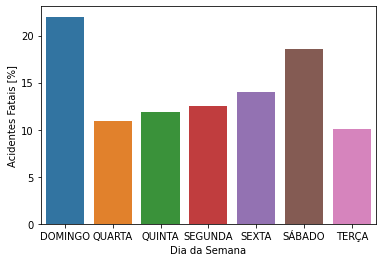

In [50]:
df_g = df_acidentes_sp_moto.groupby(['Dia da Semana'], as_index=False)['Acidente Fatal'].sum()
df_g['Acidentes Fatais [%]'] = 100*df_g['Acidente Fatal']/df_g['Acidente Fatal'].sum()
sns.barplot(x="Dia da Semana", y="Acidentes Fatais [%]", data=df_g)


In [114]:
df_g

,Dia da Semana,Acidente Fatal,Acidentes Fatais [%]
0,DOMINGO,950,22.000926
1,QUARTA,472,10.930987
2,QUINTA,513,11.880500
3,SEGUNDA,541,12.528949
4,SEXTA,604,13.987957
5,SÁBADO,801,18.550255
6,TERÇA,437,10.120426


<AxesSubplot:xlabel='Dia da Semana', ylabel='Acidente Fatal'>

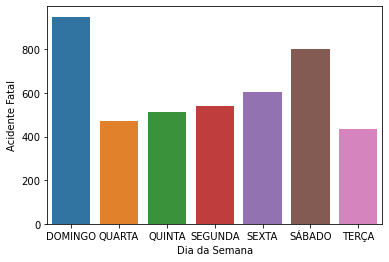

In [51]:
sns.barplot(x="Dia da Semana", y='Acidente Fatal', data=df_g)

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dia da Semana'>

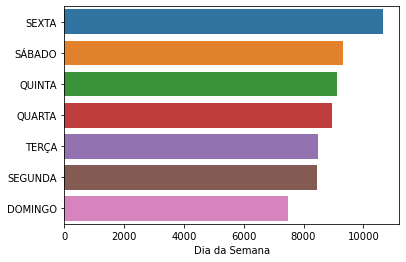

In [46]:
sns.barplot(df_acidentes_sp_moto['Dia da Semana'].value_counts(),df_acidentes_sp_moto['Dia da Semana'].value_counts().index)

In [84]:
df_dias_all = pd.DataFrame(df_acidentes_sp_moto['Dia da Semana'].value_counts())
df_dias_all.reset_index(inplace=True)
df_dias_all = df_dias_all.rename(columns={'index': 'Dia da Semana', 'Dia da Semana': 'Acidentes'})
df_dias_all

,Dia da Semana,Acidentes
0,SEXTA,10658
1,SÁBADO,9328
2,QUINTA,9116
3,QUARTA,8937
4,TERÇA,8497
5,SEGUNDA,8456
6,DOMINGO,7487


In [85]:
df_dias_fatal = pd.DataFrame(df_acidentes_sp_moto['Dia da Semana'].loc[df_acidentes_sp_moto['Acidente Fatal']==1].value_counts())
df_dias_fatal.reset_index(inplace=True)
df_dias_fatal = df_dias_fatal.rename(columns={'index': 'Dia da Semana', 'Dia da Semana': 'Acidentes Fatais'})
df_dias_fatal

,Dia da Semana,Acidentes Fatais
0,DOMINGO,950
1,SÁBADO,801
2,SEXTA,604
3,SEGUNDA,541
4,QUINTA,513
5,QUARTA,472
6,TERÇA,437


In [106]:
df_dias = df_dias_all.merge(df_dias_fatal,on='Dia da Semana')

# # df_dias['Nao Fatal'] = df_Ano['Acidentes']-df_Ano['Fatal']
df_dias

,Dia da Semana,Acidentes,Acidentes Fatais
0,SEXTA,10658,604
1,SÁBADO,9328,801
2,QUINTA,9116,513
3,QUARTA,8937,472
4,TERÇA,8497,437
5,SEGUNDA,8456,541
6,DOMINGO,7487,950


In [155]:
df_dias[['Acidentes [%]']] = 100*df_dias['Acidentes']/df_dias['Acidentes'].sum()
df_dias['Acidentes Fatais [%]'] = 100*df_dias['Acidentes Fatais']/df_dias['Acidentes Fatais'].sum()
df_dias2 = df_dias[['Dia da Semana','Acidentes [%]','Acidentes Fatais [%]']]

In [156]:
df_dias_mltd = df_dias2.melt(id_vars='Dia da Semana')
df_dias_mltd

,Dia da Semana,variable,value
0,SEXTA,Acidentes [%],17.058532
1,SÁBADO,Acidentes [%],14.929816
2,QUINTA,Acidentes [%],14.590502
3,QUARTA,Acidentes [%],14.304006
4,TERÇA,Acidentes [%],13.599770
5,SEGUNDA,Acidentes [%],13.534147
6,DOMINGO,Acidentes [%],11.983226
7,SEXTA,Acidentes Fatais [%],13.987957
8,SÁBADO,Acidentes Fatais [%],18.550255
9,QUINTA,Acidentes Fatais [%],11.880500


([<matplotlib.axis.YTick at 0x25ea8473340>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

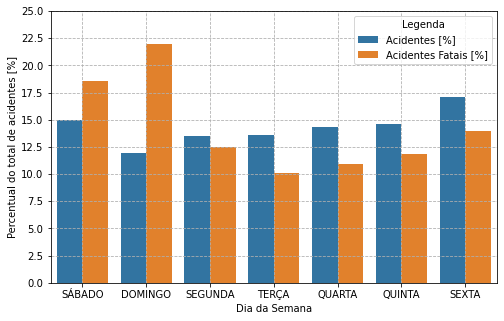

In [160]:
plt.figure(figsize=(8,5))
sns.barplot(x=df_dias_mltd['Dia da Semana'],y=df_dias_mltd['value'],hue=df_dias_mltd['variable'],order=['SÁBADO','DOMINGO','SEGUNDA','TERÇA','QUARTA','QUINTA','SEXTA'])
plt.grid(linestyle='--')
plt.legend(title='Legenda', loc='upper right')#,labels=['1','2'
plt.ylabel('Percentual do total de acidentes [%]')
plt.yticks(np.linspace(0,25,11))

In [ ]:
# cond climaticas

In [136]:
df_acidentes_sp_moto['Condições Climáticas'].loc[df_acidentes_sp_moto['Condições Climáticas']=='VENTO   ']

Series([], Name: Condições Climáticas, dtype: object)

In [135]:
df_acidentes_sp_moto.loc[12207, 'Condições Climáticas'] = 'BOM'

In [138]:
df_cond = df_acidentes_sp_moto.groupby(['Condições Climáticas'], as_index=False).sum()
df_cond

,Condições Climáticas,Acidente Fatal,Acidente Não Fatal
0,BOM,670,45354
1,CHUVA,55,4249
2,NEVOEIRO/NEBLINA,5,242
3,NUBLADO,0,375


In [ ]:
df_cond[['Quantidade Acidentes [%]']] = 100*df_cond['Acidentes']/df_dias['Acidentes'].sum()
df_dias['Quantidade Acidentes Fatais [%]'] = 100*df_dias['Acidentes Fatais']/df_dias['Acidentes Fatais'].sum()

In [139]:
df_cond_mltd = df_cond.melt(id_vars='Condições Climáticas')
df_cond_mltd

,Condições Climáticas,variable,value
0,BOM,Acidente Fatal,670
1,CHUVA,Acidente Fatal,55
2,NEVOEIRO/NEBLINA,Acidente Fatal,5
3,NUBLADO,Acidente Fatal,0
4,BOM,Acidente Não Fatal,45354
5,CHUVA,Acidente Não Fatal,4249
6,NEVOEIRO/NEBLINA,Acidente Não Fatal,242
7,NUBLADO,Acidente Não Fatal,375


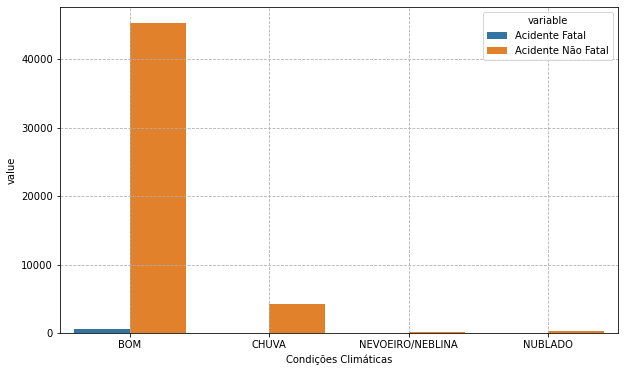

In [140]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_cond_mltd['Condições Climáticas'],y=df_cond_mltd['value'],hue=df_cond_mltd['variable'])
plt.grid(linestyle='--')

In [118]:
df_C_Fatal = df_acidentes_sp_moto.groupby(['Condições Climáticas'], as_index=False)['Acidente Fatal'].sum()

In [119]:
df_C_Fatal

,Condições Climáticas,Acidente Fatal
0,BOM,670
1,CHUVA,55
2,NEVOEIRO/NEBLINA,5
3,NUBLADO,0
4,URBANA,0
5,VENTO,0
